# 🚘 Car Price Prediction with Random Forest Regressor
Welcome to this notebook where we predict car prices using powerful machine learning techniques!

This notebook includes EDA, feature preprocessing, Machine Learning models training & HyperParameter Tuning, and more.

Let’s dive into the data science journey together! 💻📊

# All Used Libraries Compiled here 🔽

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Importing The DataSet from Kaggle

In [5]:
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

In [6]:
df = pd.read_csv(path + '/Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# EDA + Primal Pre-Processing

In [7]:
df.shape

(8128, 13)

In [8]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## 5 Point Summary & Prep Tips
 - Data is normaly distributed
 - Handle Nullity
 - Drop duplicates
 - Apply Feature Encoding to ALL Object Columns


## Pre-Processing

In [10]:
df.drop_duplicates(inplace=True)
df.drop(columns=['name'],inplace=True)
df.drop(columns=['torque'],inplace=True)
df['age']= df['year'].max()-df['year']
df.drop(columns=['year'],inplace=True)

In [11]:
objs = ['fuel','seller_type','transmission',	'owner']
Enc = LabelEncoder()
for obj in objs:
      df[obj] = Enc.fit_transform(df[obj])

In [12]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,1,1,1,0,23.4 kmpl,1248 CC,74 bhp,5.0,6
1,370000,120000,1,1,1,2,21.14 kmpl,1498 CC,103.52 bhp,5.0,6
2,158000,140000,3,1,1,4,17.7 kmpl,1497 CC,78 bhp,5.0,14
3,225000,127000,1,1,1,0,23.0 kmpl,1396 CC,90 bhp,5.0,10
4,130000,120000,3,1,1,0,16.1 kmpl,1298 CC,88.2 bhp,5.0,13


## Data Cleaning

In [13]:
for col in df.columns:
  df[col] = df[col].astype(str).str.extract(r'(\d+\.?\d*)')
  df[col] = pd.to_numeric(df[col], errors='coerce')
  df[col].fillna(df[col].mean(),inplace=True)

In [14]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0,6
1,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,6
2,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0,14
3,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0,10
4,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0,13


## Further EDA

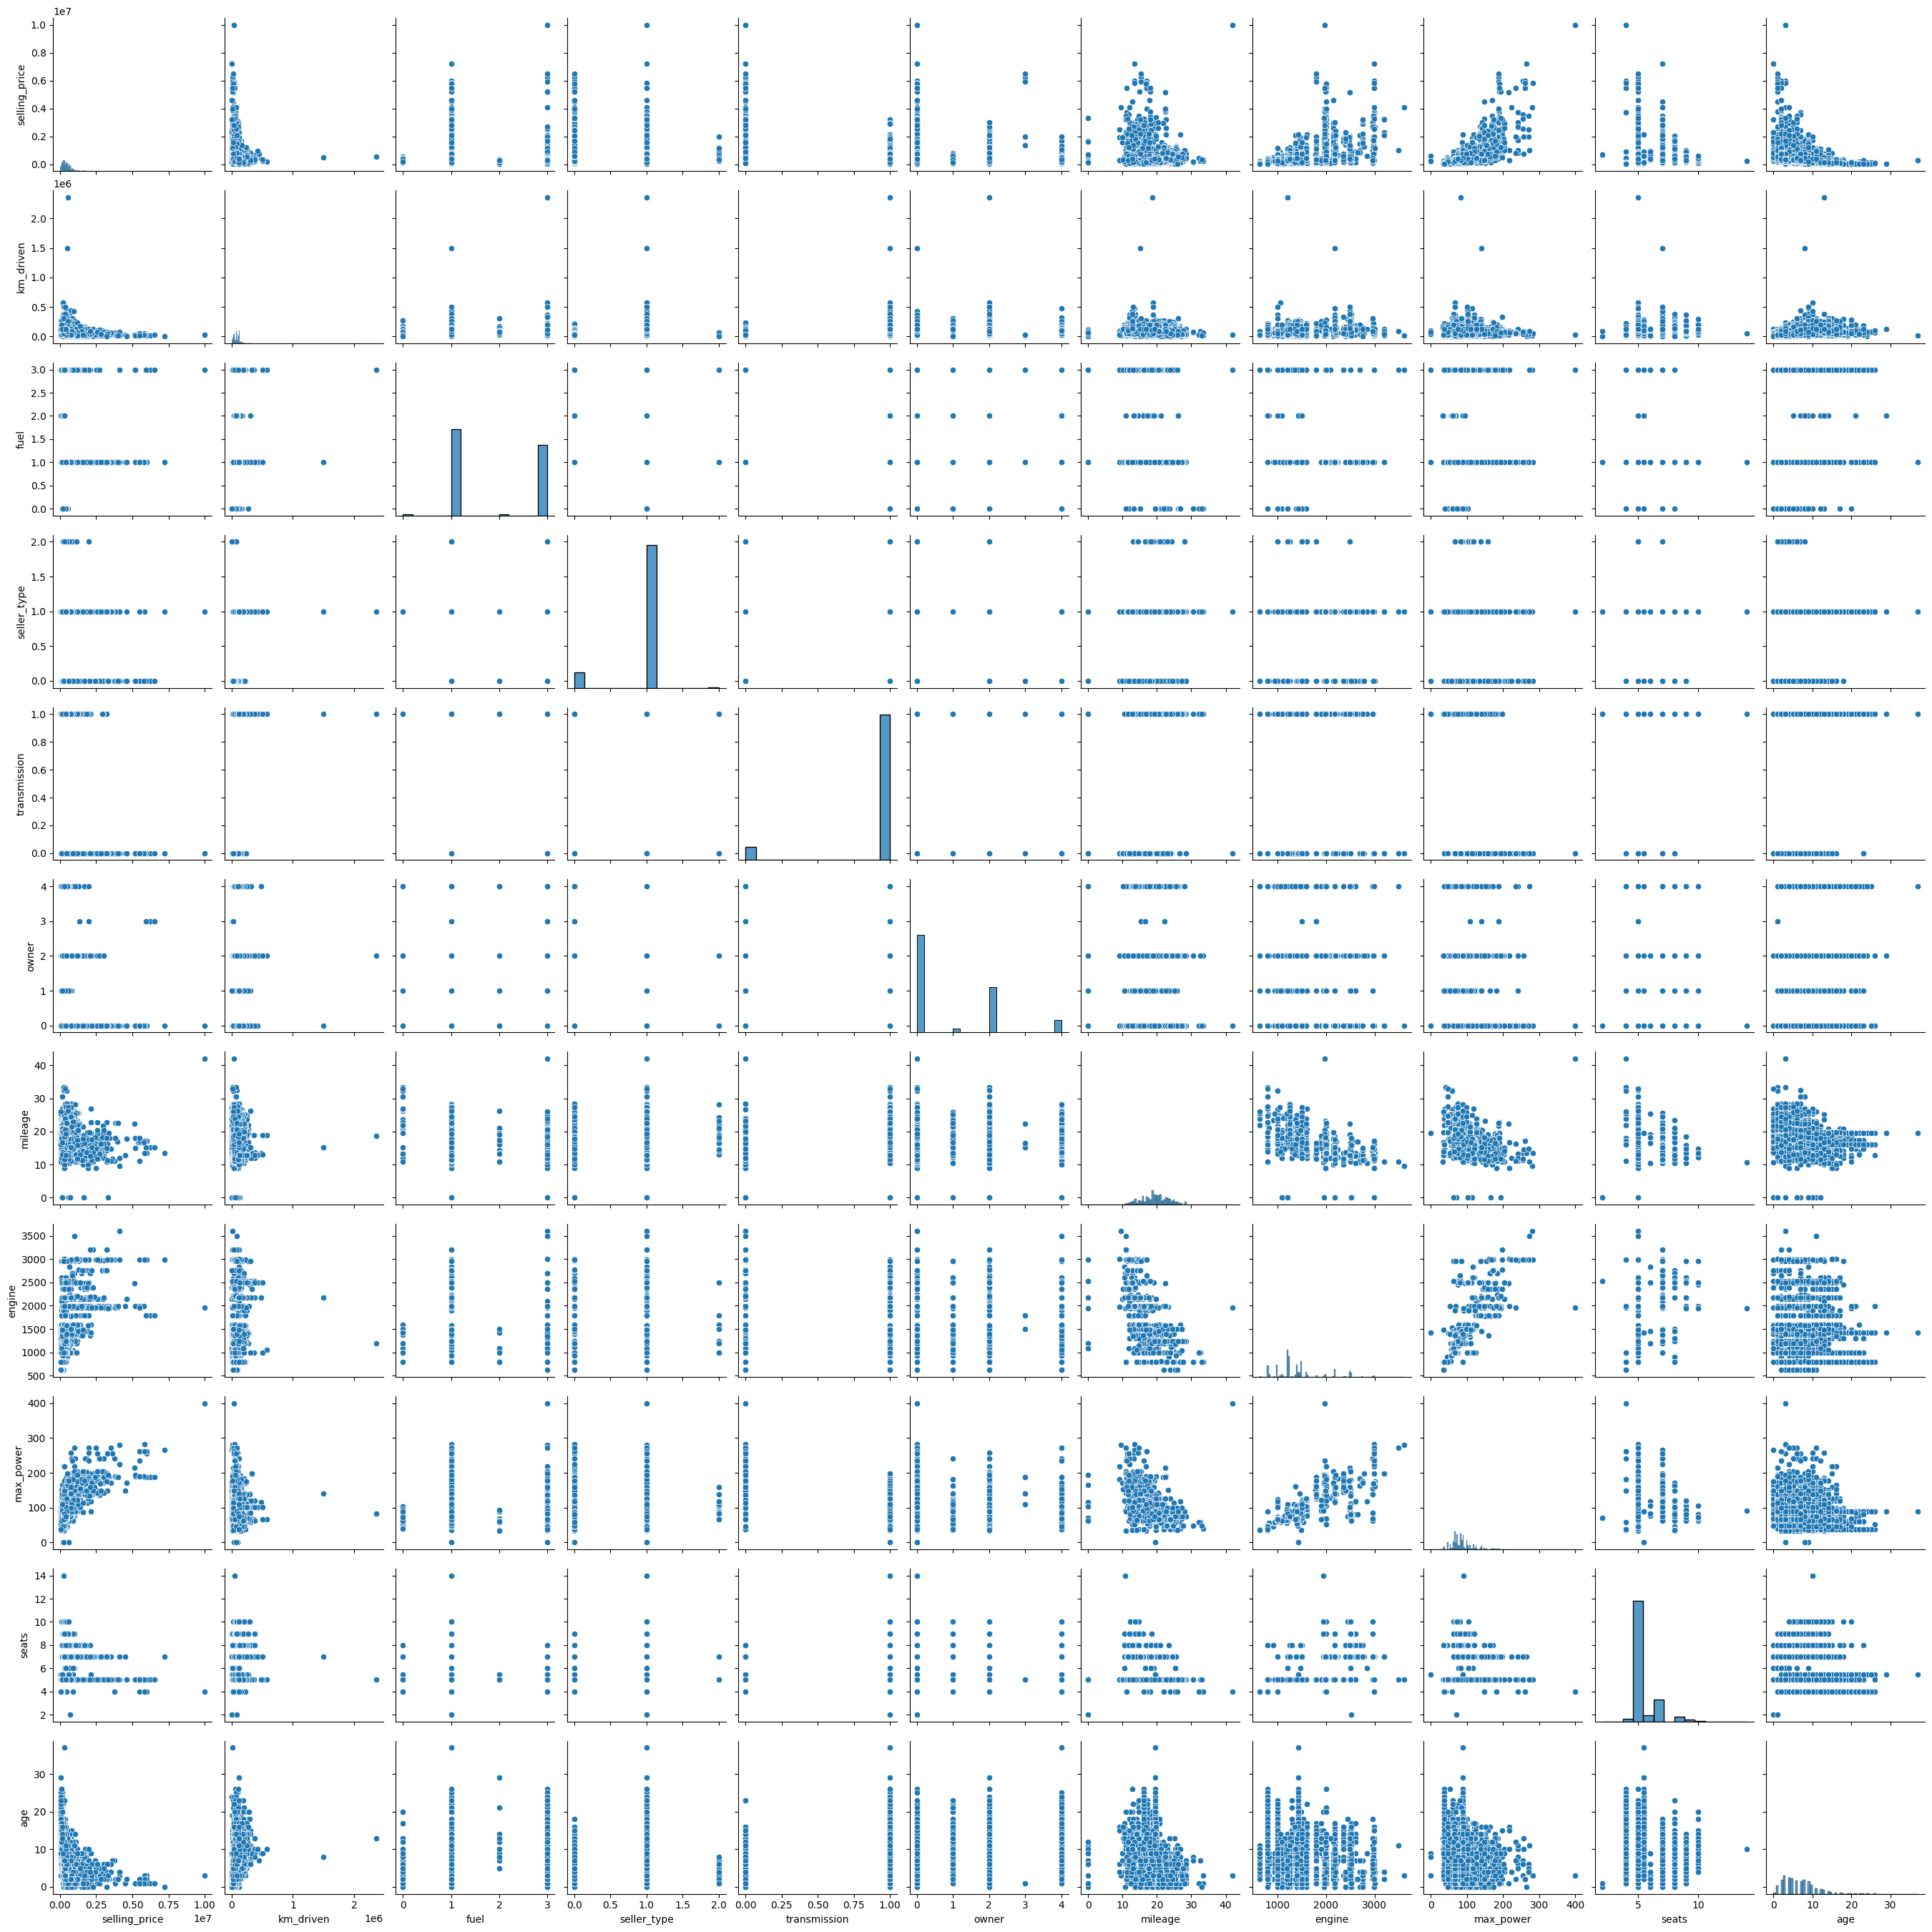

In [15]:
sns.pairplot(df)

<Axes: >

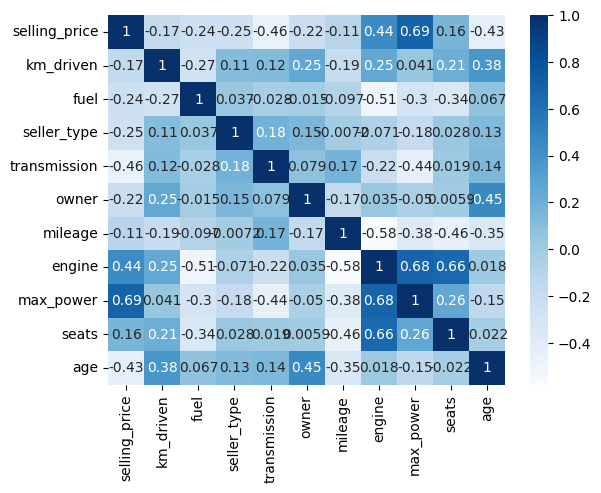

In [16]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

## Outliers Analysis
- Outliers are pretty reasonable & useful(e.g: Car Prices could be very high due to rare specs or sollections)

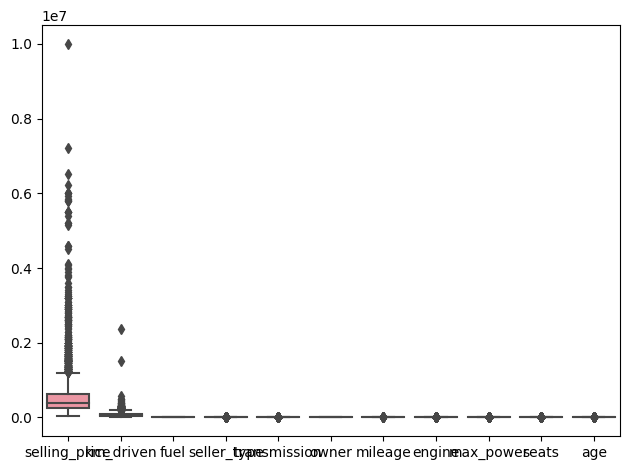

In [17]:
sns.boxplot(data=df)
plt.tight_layout()
plt.show()

In [18]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Features Selection

In [20]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

# Get feature importances
importances = rf.feature_importances_
features = x_train.columns

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Display top N important features
print(importance_df.head(10))

# Optionally: remove features with low importance
low_impact_features = importance_df[importance_df['importance'] < 0.01]['feature'].tolist()
X_train_filtered = x_train.drop(columns=low_impact_features)
X_test_filtered = x_test.drop(columns=low_impact_features)

        feature  importance
7     max_power    0.608086
9           age    0.232333
0     km_driven    0.049612
5       mileage    0.048201
6        engine    0.029557
8         seats    0.011217
3  transmission    0.008013
1          fuel    0.005051
4         owner    0.004953
2   seller_type    0.002977


In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Using CV to Select a ML Model (Guided by Occam's Razor: The Simpler, The Better)


In [22]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    scores= cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_rmse = np.mean(np.sqrt(-scores))
    print(f"{name} - Mean RMSE: {mean_rmse}")



Linear Regression - Mean RMSE: 326373.6278944833
Random Forest - Mean RMSE: 178625.93858999162


# Hyper Parameter Tuning

In [23]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [24]:
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
y_pred=best_model.predict(x_test)

# Evaluating RF Performance

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nFinal Model Performance on Test Set:")
print(f"RMSE: {rmse/y_test.mean()*100:.2f}")
print(f"R² Score: {r2:.2f}")


Final Model Performance on Test Set:
RMSE: 27.00
R² Score: 0.92


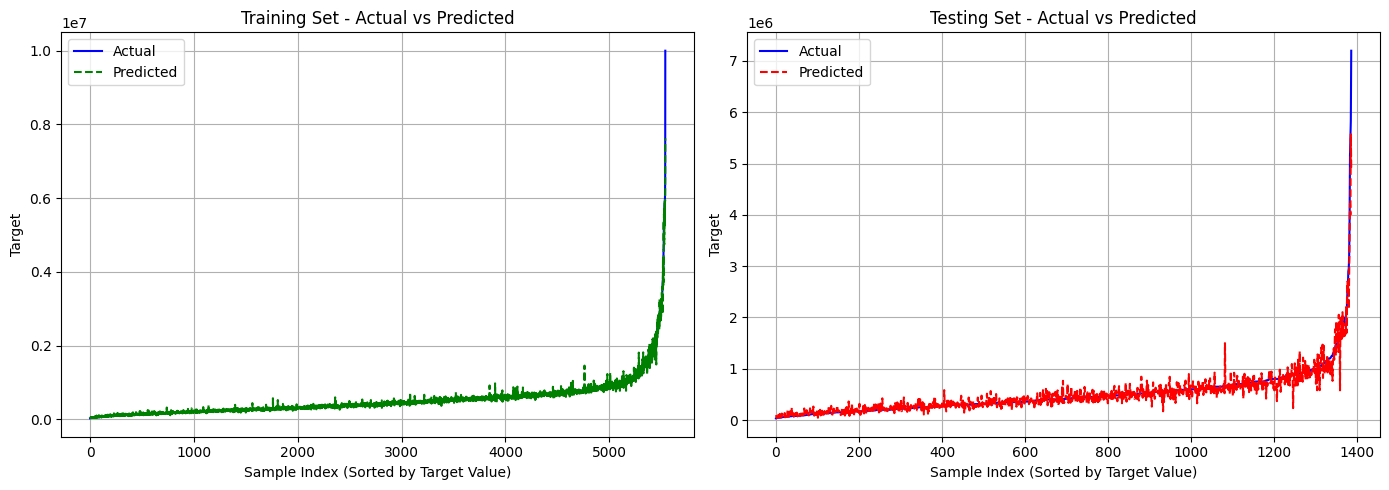

In [27]:
# Predict again if needed
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)

# Sort for smoother line plots (optional but helps visualize patterns)
train_sort_idx = np.argsort(y_train.values)
test_sort_idx = np.argsort(y_test.values)

# === Plot training set predictions ===
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(y_train.values[train_sort_idx], label='Actual', color='blue')
plt.plot(y_train_pred[train_sort_idx], label='Predicted', color='green', linestyle='--')
plt.title("Training Set - Actual vs Predicted")
plt.xlabel("Sample Index (Sorted by Target Value)")
plt.ylabel("Target")
plt.legend()
plt.grid(True)

# === Plot testing set predictions ===
plt.subplot(1, 2, 2)
plt.plot(y_test.values[test_sort_idx], label='Actual', color='blue')
plt.plot(y_test_pred[test_sort_idx], label='Predicted', color='red', linestyle='--')
plt.title("Testing Set - Actual vs Predicted")
plt.xlabel("Sample Index (Sorted by Target Value)")
plt.ylabel("Target")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()